In [80]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
from sklearn.cluster import DBSCAN, KMeans


import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv('../DataSets/training-a/REFERENCE.csv')
data.head(5)

,a0001,1
0,a0002,1
1,a0003,1
2,a0004,1
3,a0005,1
4,a0006,1


In [14]:
data.shape

(408, 2)

In [49]:

y, sr = librosa.load('../DataSets/training-a/a0001.wav',offset=5, duration=25)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 1077)

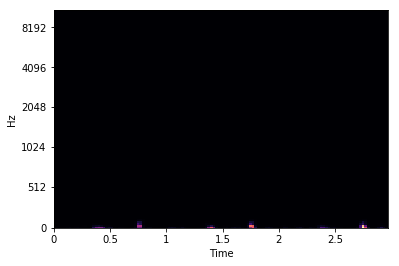

In [16]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [63]:
D = [] # Dataset new
#for row in data.itertuples():
#    for i in np.arange(0,30,2.97):
#            y, sr = librosa.load('../DataSets/training-a/' + row[1] + '.wav',offset=i, duration=2.97)
#            ps = librosa.feature.melspectrogram(y=y, sr=sr)
#            print(row[1])
#            if ps.shape != (128, 128): break
#            D.append(ps)
                
for row in data.itertuples():
    y, sr = librosa.load('../DataSets/training-a/' + row[1] + '.wav',offset=5, duration=25)
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    print(row[1]+"  shape:  "+str(ps.shape[1]))
    if ps.shape[1] == 1077:
        D.append(ps)
        print(len(D))
    
    #if row[1] == "a0101":break
    #if ps.shape != (128, 1077):
        
    
    

a0002  shape:  682
a0003  shape:  1077
1
a0004  shape:  1077
2
a0005  shape:  1077
3
a0006  shape:  679
a0007  shape:  1077
4
a0008  shape:  1077
5
a0009  shape:  1077
6
a0010  shape:  1077
7
a0011  shape:  1077
8
a0012  shape:  1077
9
a0013  shape:  1077
10
a0014  shape:  1077
11
a0015  shape:  1077
12
a0016  shape:  1077
13
a0017  shape:  1077
14
a0018  shape:  685
a0019  shape:  1077
15
a0020  shape:  1077
16
a0021  shape:  1077
17
a0022  shape:  1077
18
a0023  shape:  1077
19
a0024  shape:  676
a0025  shape:  1077
20
a0026  shape:  1077
21
a0027  shape:  1077
22
a0028  shape:  1077
23
a0029  shape:  1077
24
a0030  shape:  1077
25
a0031  shape:  1077
26
a0032  shape:  1077
27
a0033  shape:  1077
28
a0034  shape:  1077
29
a0035  shape:  1033
a0036  shape:  1077
30
a0037  shape:  1077
31
a0038  shape:  1077
32
a0039  shape:  1077
33
a0040  shape:  1077
34
a0041  shape:  1077
35
a0042  shape:  1077
36
a0043  shape:  1077
37
a0044  shape:  1077
38
a0045  shape:  1077
39
a0046  shape:  1

a0358  shape:  673
a0359  shape:  1077
312
a0360  shape:  673
a0361  shape:  1077
313
a0362  shape:  1077
314
a0363  shape:  1077
315
a0364  shape:  1077
316
a0365  shape:  1077
317
a0366  shape:  1077
318
a0367  shape:  1077
319
a0368  shape:  1077
320
a0369  shape:  682
a0370  shape:  1077
321
a0371  shape:  688
a0372  shape:  1077
322
a0373  shape:  1077
323
a0374  shape:  1077
324
a0375  shape:  1077
325
a0376  shape:  1077
326
a0377  shape:  1077
327
a0378  shape:  1077
328
a0379  shape:  1077
329
a0380  shape:  1077
330
a0381  shape:  1077
331
a0382  shape:  682
a0383  shape:  682
a0384  shape:  1077
332
a0385  shape:  688
a0386  shape:  1077
333
a0387  shape:  1077
334
a0388  shape:  1077
335
a0389  shape:  1077
336
a0390  shape:  1077
337
a0391  shape:  1077
338
a0392  shape:  1077
339
a0393  shape:  1077
340
a0394  shape:  849
a0395  shape:  422
a0396  shape:  1077
341
a0397  shape:  1077
342
a0398  shape:  1077
343
a0399  shape:  1077
344
a0400  shape:  488
a0401  shape:  107

In [64]:
print("Number of samples: ", len(D))
D[15].shape

Number of samples:  352


(128, 1077)

In [65]:
#need for shuffle 
dataset = D
random.shuffle(dataset)


In [66]:
train = dataset[:100]
test = dataset[100:]
  

In [72]:
# Reshape for CNN input
X_train = np.array([x.reshape( (137856) ) for x in train])
#X_test = np.array([x.reshape( (128, 128, 1) ) for x in test])
X_train[0].shape

(137856,)

In [87]:
#X_train.shape
clustering = DBSCAN(eps=5, min_samples=6).fit(X_train)
cluster2 = KMeans(n_clusters=6, random_state=0).fit(X_train)

In [88]:
cluster2.labels_

array([0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])